In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import matplotlib.patches as patches #for drawing shapes

In [2]:
df_cars = pd.read_csv("data/cars.csv")

#Get average miles per gallon for each car with the same number of cylinders
avg_mpg = df_cars.groupby('CYL').mean()["MPG"]
avg_wgt = df_cars.groupby("CYL").mean()["WGT"]

#Get average miles per gallon for each car with the same weight
avg_mpg_per_wgt = df_cars.groupby("WGT").mean()["MPG"]

#Get the unique list of cylinders in numerical order
cyl = sorted(df_cars['CYL'].unique())

#Get a list of all mpg values for three specific cylinder sizes
cyl4 = df_cars[df_cars["CYL"] == 4]['MPG'].values
cyl6 = df_cars[df_cars['CYL'] == 6]['MPG'].values
cyl8 = df_cars[df_cars['CYL'] == 8]['MPG'].values

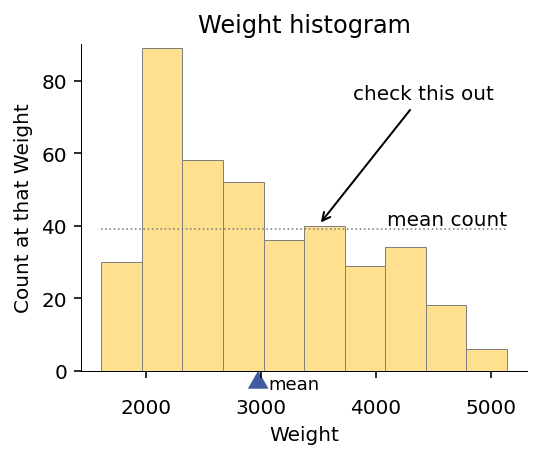

In [25]:
fig, ax = plt.subplots(figsize = (4, 3))

wgt = df_cars['WGT']
n, bins, hpatches = ax.hist(wgt, color = '#FEE08F')
ax.set_xlabel("Weight")
ax.set_ylabel("Count at that Weight")
ax.set_title("Weight histogram")

for rect in hpatches: 
    rect.set_linewidth(.5)
    rect.set_edgecolor('grey')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)

mx = wgt.mean() #mean of the weights
my = n.mean() #n is a numpy array of all the counts at each weight 

#line at the mean
ax.plot([min(wgt), max(wgt)], [my, my], ":", lw = .8, c = 'grey')
ax.text(max(wgt), my+1, "mean count", horizontalalignment = 'right')

#create an arrow
#xy = where want to point at
#xytext = where to put the text
#arrowprops tells it to put an arrow
ax.annotate("check this out", xy = (3500, 40), xytext = (3800, 75), 
           arrowprops = dict(color = 'black', arrowstyle = '->'))

#create a wedge at the mean of weight
tria = [(mx, 0), (mx + 90, -5), (mx - 90, -5)] #points in the polygon
tria = np.array(tria)
wedge = patches.Polygon(tria, closed = True, facecolor = '#415BA3')

#need below two lines to add a wedge
wedge.set_clip_on(False) #clip since the wedge is outside the drawing region
ax.add_patch(wedge)

ax.text(mx + 90, -5, "mean", fontsize = 9)
ax.tick_params(axis = 'x', pad = 10)
ax.set_ylim(0, 90)

plt.show()

## Exercise 1

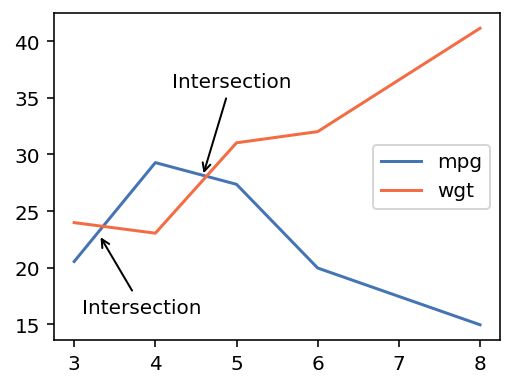

In [36]:
fig, ax = plt.subplots(figsize = (4, 3))
#add two lines with different labels on the same plot
ax.plot(cyl, avg_mpg, c = '#4574B4', label = "mpg")
ax.plot(cyl, avg_wgt / 100, c = '#F46C43', label = 'wgt')

ax.annotate("Intersection", xy = (4.58, 28), xytext = (4.2, 36), 
              arrowprops = dict(color = 'black', arrowstyle = '->'))

ax.annotate("Intersection", xy = (3.3, 23), xytext = (3.1, 16), arrowprops = dict(color = 'black', 
                                                                   arrowstyle = '->'))

plt.legend(loc = "center right")
plt.show()

## Patches (shapes)

In [37]:
import matplotlib.patches as patches

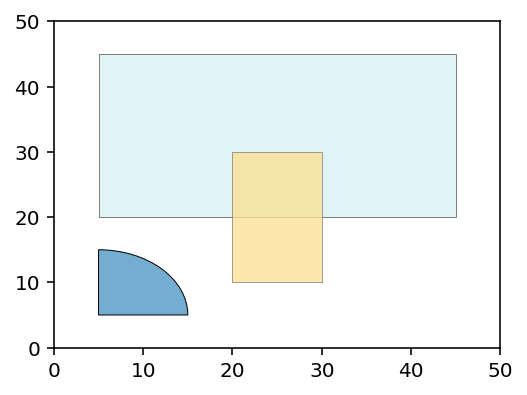

In [44]:
fig, ax = plt.subplots(figsize = (4, 3))

ax.set_xlim(0, 50)
ax.set_ylim(0, 50)

rect = patches.Rectangle(xy = (5, 20), width = 40, height = 25, facecolor = "#E0F4F7", 
                       linewidth = .5, edgecolor = 'grey')
ax.add_patch(rect)

rect = patches.Rectangle(xy = (20, 10), width = 10, height = 20, alpha = .75, 
                         facecolor = '#FEE08F', linewidth = .5, edgecolor = "grey")
ax.add_patch(rect)

#theta = 0 starts at the right center and theta 2 is where the circle stops
#theta2 = 360 at theta1 = 0 is the full circle
ax.add_patch( patches.Wedge(center=(5,5), r = 10, theta1 = 0, theta2 = 90, 
                           facecolor = '#73ADD2', linewidth=.5, edgecolor='black'))

plt.show()

## Exercise 2

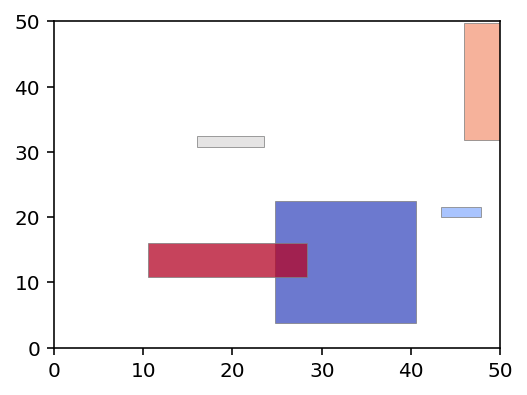

In [46]:
fig, ax = plt.subplots(figsize = (4, 3))

size = 50
ax.set_xlim(0, size)
ax.set_ylim(0, size)

n = 5

#np.random.rand(x, y) --> matrix of x rows and y columns of random values uniformly 0-> 1
#np.random.rand(x) --> x values of random values uniformly 0-> 1
xy = np.random.rand(n, 2) * size 
w = np.random.rand(n) * size / 2
h = np.random.rand(n) * size / 2

cmap = plt.get_cmap('coolwarm')
colors = cmap(np.linspace(0, 1, num = n)) #get colors 

#Draw Random Rectangles
for i in np.arange(n): 
    rect = patches.Rectangle(xy = xy[i], width = w[i], height = h[i], alpha = .75,
                             facecolor = colors[i], linewidth = .5, 
                             edgecolor = "grey")
    ax.add_patch(rect)

plt.show()

## Strip Plots

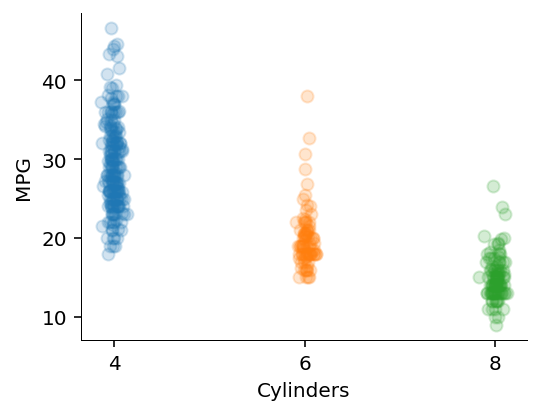

In [58]:
fig, ax = plt.subplots(figsize = (4, 3))

n4 = len(cyl4)
n6 = len(cyl6)
n8 = len(cyl8)

mu = 0
sigma = 0.05

x_noise4 = np.random.normal(mu, sigma, size = n4)
x_noise6 = np.random.normal(mu, sigma, size = n6)
x_noise8 = np.random.normal(mu, sigma, size = n8)

ax.scatter(4 + x_noise4, cyl4, alpha = .2)
ax.scatter(6 + x_noise6, cyl6, alpha = .2)
ax.scatter(8 + x_noise8, cyl8, alpha = .2)

ax.set_xticks([4, 6, 8])

ax.set_xlabel("Cylinders")
ax.set_ylabel("MPG")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(.5)
ax.spines["bottom"].set_linewidth(.5)

plt.show()

## Exercise 3

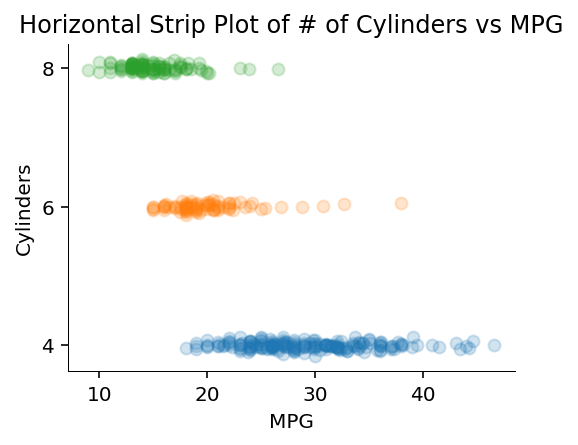

In [66]:
fig, ax = plt.subplots(figsize = (4, 3))

ax.set_yticks([4, 6, 8])

mu = 0
sigma = 0.05

y_noise4 = np.random.normal(mu, sigma, size = n4)
y_noise6 = np.random.normal(mu, sigma, size = n6)
y_noise8 = np.random.normal(mu, sigma, size = n8)

ax.scatter(cyl4, 4 + y_noise4, alpha = .2)
ax.scatter(cyl6, 6 + y_noise6, alpha = .2)
ax.scatter(cyl8, 8 + y_noise8, alpha = .2)

ax.set_title("Horizontal Strip Plot of # of Cylinders vs MPG")
ax.set_xlabel("MPG")
ax.set_ylabel("Cylinders")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(.5)
ax.spines["bottom"].set_linewidth(.5)

plt.show()

## Pandas Intro

dataframe --> got rows and columns, its a type, in memory whereas database stays on disk so if program fails, dataframe is gone but not database

series --> like an array with an index

interview --> give data, ask what you want to know about data etc..., 

    - how big is it?
    
    - names of columns (types of columns)?
    
    - are things read in properly (ex: date read as string instead of datetime)
    
    - which columns are categorical (ordinal?, non-ordinal?) and which are quantitative 
    
    - average, standard deviation, min, max for quantitative data
    
        - simple bar charts, scatterplots, histogram, pair plot (relationships, correlations among quantitative var)
        
    - *** Is anything missing **** --> do they show no value, or "None", etc..
    
    
 - Every thing in python has a value and a type

In [68]:
import numpy as np
import pandas as pd

In [69]:
! ls data

cars.csv                      kaggle-uber-other-federal.csv
happy-2015.csv                organdonation.csv
happy-2016.csv


In [71]:
df_cars = pd.read_csv("data/cars.csv")
df_cars.head()

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449


|Description| Python | Pandas|
| ----------- | --------- | ---- |
|Integers| `int`|`int64`|
|Text| `str`| `object`|
|Double/Float| `float`|`float64` |
|Boolean (T/F)| `bool`| `bool`|
|Date/Time| `datetime` | `datetime64`|
|Categorical| n/a | `category` (held internally as an integer)|

In [73]:
a = 34
b = 'hi'
type(a), type(b), a.__class__, b.__class__,  a.__class__.__name__, b.__class__.__name__

(int, str, int, str, 'int', 'str')

In [74]:
type(np.array([1, 2, 3]))

numpy.ndarray

In [75]:
type(df_cars["MPG"])

pandas.core.series.Series

In [76]:
type(3.14), df_cars["MPG"].dtype

(float, dtype('float64'))

In [78]:
df_uber = pd.read_csv("data/kaggle-uber-other-federal.csv")
df_uber.head(3)

,Date,Time,PU_Address,DO_Address,Routing Details,PU_Address.1,Status
0,07/01/2014,07:15 AM,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;","1 Brookdale Plaza, BK NY;","PU: Brooklyn Museum, 200 Eastern Pkwy., BK NY;...","Brooklyn Museum, 200 Eastern Pkwy., BK NY; DO:...",Cancelled
1,07/01/2014,07:30 AM,"33 Robert Dr., Short Hills NJ;","John F Kennedy International Airport, vitona A...","PU: 33 Robert Dr., Short Hills NJ; DO: John F ...","33 Robert Dr., Short Hills NJ; DO: John F Kenn...",Arrived
2,07/01/2014,08:00 AM,"60 Glenmore Ave., BK NY;","2171 Nostrand Ave., BK NY;","PU: 60 Glenmore Ave., BK NY; DO: 2171 Nostrand...","60 Glenmore Ave., BK NY; DO: 2171 Nostrand Ave...",Assigned


In [94]:
df_uber = pd.read_csv("data/kaggle-uber-other-federal.csv", 
                      parse_dates = ["Date", "Time"], 
                      dtype = {"Status": "category"})
df_uber.head(3)

,Date,Time,PU_Address,DO_Address,Routing Details,PU_Address.1,Status
0,2014-07-01,2020-09-10 07:15:00,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;","1 Brookdale Plaza, BK NY;","PU: Brooklyn Museum, 200 Eastern Pkwy., BK NY;...","Brooklyn Museum, 200 Eastern Pkwy., BK NY; DO:...",Cancelled
1,2014-07-01,2020-09-10 07:30:00,"33 Robert Dr., Short Hills NJ;","John F Kennedy International Airport, vitona A...","PU: 33 Robert Dr., Short Hills NJ; DO: John F ...","33 Robert Dr., Short Hills NJ; DO: John F Kenn...",Arrived
2,2014-07-01,2020-09-10 08:00:00,"60 Glenmore Ave., BK NY;","2171 Nostrand Ave., BK NY;","PU: 60 Glenmore Ave., BK NY; DO: 2171 Nostrand...","60 Glenmore Ave., BK NY; DO: 2171 Nostrand Ave...",Assigned


In [148]:
print(df_uber["Status"])
df_uber["Date"]

0     Cancelled
1       Arrived
2      Assigned
3      Assigned
4      Assigned
        ...    
94     Assigned
95    Cancelled
96      Arrived
97     Assigned
98      Arrived
Name: Status, Length: 99, dtype: category
Categories (3, object): [Arrived, Assigned, Cancelled]


0    2014-07-01
1    2014-07-01
2    2014-07-01
3    2014-07-01
4    2014-07-01
        ...    
94   2014-07-21
95   2014-07-21
96   2014-07-21
97   2014-07-21
98   2014-07-22
Name: Date, Length: 99, dtype: datetime64[ns]

In [95]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             99 non-null     datetime64[ns]
 1   Time             99 non-null     datetime64[ns]
 2   PU_Address       99 non-null     object        
 3   DO_Address       98 non-null     object        
 4   Routing Details  99 non-null     object        
 5   PU_Address.1     99 non-null     object        
 6   Status           99 non-null     category      
dtypes: category(1), datetime64[ns](2), object(4)
memory usage: 5.0+ KB


In [103]:
df_cars["MPG"] / df_cars["ENG"] #element wise division through the series 

0      0.058632
1      0.042857
2      0.056604
3      0.052632
4      0.056291
         ...   
387    0.192857
388    0.453608
389    0.237037
390    0.233333
391    0.260504
Length: 392, dtype: float64

In [105]:
df_cars.describe().style.format("{:.2f}")

,MPG,CYL,ENG,WGT
count,392.00,392.00,392.00,392.00
mean,23.45,5.47,194.41,2977.58
std,7.81,1.71,104.64,849.40
min,9.00,3.00,68.00,1613.00
25%,17.00,4.00,105.00,2225.25
50%,22.75,4.00,151.00,2803.50
75%,29.00,8.00,275.75,3614.75
max,46.60,8.00,455.00,5140.00


In [107]:
df_cars.head(5).style.format("{:.1f}")

,MPG,CYL,ENG,WGT
0,18.0,8.0,307.0,3504.0
1,15.0,8.0,350.0,3693.0
2,18.0,8.0,318.0,3436.0
3,16.0,8.0,304.0,3433.0
4,17.0,8.0,302.0,3449.0


## Series

In [108]:
a = pd.Series([10, 2.4, 81, 1005])
a

0      10.0
1       2.4
2      81.0
3    1005.0
dtype: float64

In [110]:
type(a), len(a)

(pandas.core.series.Series, 4)

In [111]:
b = pd.Series(["Xue", "Mary", "Ollie"])
print("Type is", b.dtype)
b

Type is object


0      Xue
1     Mary
2    Ollie
dtype: object

In [112]:
a.min(), a.mean(), a.sum(), a.count()

(2.4, 274.6, 1098.4, 4)

In [113]:
b.str.lower() # can apply to all string objects in the series 

0      xue
1     mary
2    ollie
dtype: object

In [114]:
b.str.extract("([a-z][a-z])") #places where it sees correctly (two lower case letters)

,0
0,ue
1,ar
2,ll


In [119]:
b.index

RangeIndex(start=0, stop=3, step=1)

In [120]:
b = pd.Series([10, 2.4, 81, 1005], index = ['t', 'u', 'v', 'w'])
b

t      10.0
u       2.4
v      81.0
w    1005.0
dtype: float64

In [121]:
b.index

Index(['t', 'u', 'v', 'w'], dtype='object')

In [122]:
a[1], a.iloc[1]

(2.4, 2.4)

In [128]:
b.loc['u'], b.loc['w']

(2.4, 1005.0)

In [129]:
b.iloc[1] #i represents the index number 1 corresponding to 'u'

2.4

In [130]:
b.loc[1] #because 1 is not an index anymore

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [1] of <class 'int'>

In [131]:
b.loc['w']

1005.0

In [132]:
b.loc[['w', 't']]

w    1005.0
t      10.0
dtype: float64

In [133]:
#indices are matched up in any element operations, no matter the order of the indices
income = pd.Series([100, 110, 200, 45], index = ["WA", "NV", "CA", "IA"])
taxes = pd.Series([20, 50, 25, 5], index = ["IA", "CA", "NV", "WA"]) #diff order
print(income)
print(taxes)

WA    100
NV    110
CA    200
IA     45
dtype: int64
IA    20
CA    50
NV    25
WA     5
dtype: int64


In [134]:
income - taxes #it will subtract the values corresponding to the same indices

CA    150
IA     25
NV     85
WA     95
dtype: int64

In [135]:
a < 100

0     True
1     True
2     True
3    False
dtype: bool

In [136]:
a == 2.4

0    False
1     True
2    False
3    False
dtype: bool

In [137]:
(a < 100).any()

True

In [138]:
(a < 0).any()

False

In [139]:
a[a<100]

0    10.0
1     2.4
2    81.0
dtype: float64

In [140]:
b.values[a < 100]

array([10. ,  2.4, 81. ])

In [143]:
cyl = df_cars['CYL']
mpg = df_cars['MPG']
cyl[mpg > 30]

52     4
53     4
127    4
129    4
142    4
      ..
384    4
385    4
388    4
389    4
391    4
Name: CYL, Length: 83, dtype: int64

In [144]:
x = pd.Series([1, 2, 3], index = ['u', 'u', 't'])

In [145]:
x.loc['u']

u    1
u    2
dtype: int64